In [10]:
pip install --user imbalanced-learn

  Using cached https://files.pythonhosted.org/packages/c8/73/36a13185c2acff44d601dc6107b5347e075561a49e15ddd4e69988414c3e/imbalanced_learn-0.6.2-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/1f/e3/e400f94e368a7b0d2432a88ab671a7f27c9159f177bbed68f7cce83b5848/scikit_learn-0.22.2.post1-cp37-cp37m-win_amd64.whl
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install --user yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
##import pandas_profiling
import seaborn as sns

from scipy.stats import randint
from random import randint
from pandas import DataFrame
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, train_test_split, cross_val_score
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFECV
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, recall_score, average_precision_score, roc_auc_score, accuracy_score
from yellowbrick.classifier import PrecisionRecallCurve

from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE, BorderlineSMOTE

import warnings
warnings.filterwarnings("ignore")

C:\Users\Devjit\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [80]:
df = pd.read_csv('mci_2014_2019_temp_joined.csv')

In [81]:
df.head()
df.tail()
df.shape

,MCI,occurrencedate,reporteddate,premisetype,offence,reportedyear,reportedmonth,reportedday,reporteddayofyear,reporteddayofweek,...,Long,Lat,Temperature,average_HH_income,Employment_rate,Minority,South Asian,Asian,Arab,Black
0,Assault,2013-12-31T19:00:00.000Z,2014-07-11T10:30:00.000Z,Apartment,Assault,2014,July,11,192,Friday,...,-79.399841,43.674377,29,792507,0.748,0.124850,0.022491,0.077669,0.005998,0.018693
1,Assault,2013-12-31T22:00:00.000Z,2014-01-01T02:23:00.000Z,House,Assault,2014,January,1,1,Wednesday,...,-79.180397,43.806290,29,729154,0.707,0.625616,0.368090,0.131272,0.007207,0.119048
2,Assault,2013-12-31T22:00:00.000Z,2014-01-01T02:23:00.000Z,House,Assault,2014,January,1,1,Wednesday,...,-79.180397,43.806290,29,729154,0.707,0.625616,0.368090,0.131272,0.007207,0.119048
3,Assault,2013-12-31T21:00:00.000Z,2014-01-01T22:02:00.000Z,Commercial,Assault Bodily Harm,2014,January,1,1,Wednesday,...,-79.476593,43.764320,29,302358,0.671,0.450278,0.116111,0.181806,0.007778,0.144583
4,Assault,2013-12-31T21:00:00.000Z,2014-01-01T01:37:00.000Z,Other,Assault,2014,January,1,1,Wednesday,...,-79.386627,43.650856,29,352218,0.634,0.423753,0.068594,0.296060,0.037132,0.021967


,MCI,occurrencedate,reporteddate,premisetype,offence,reportedyear,reportedmonth,reportedday,reporteddayofyear,reporteddayofweek,...,Long,Lat,Temperature,average_HH_income,Employment_rate,Minority,South Asian,Asian,Arab,Black
65926,Theft Over,2019-12-02T17:00:00.000Z,2019-12-03T16:32:00.000Z,Apartment,Theft Over,2019,December,3,337,Tuesday,...,-79.475967,43.699432,29,176688,0.667,0.378259,0.050042,0.125526,0.002103,0.200589
65927,Theft Over,2019-12-01T12:00:00.000Z,2019-12-03T12:06:00.000Z,House,Theft Over,2019,December,3,337,Tuesday,...,-79.432968,43.733055,29,720203,0.711,0.104386,0.010994,0.083605,0.002175,0.007611
65928,Theft Over,2019-07-01T00:00:00.000Z,2019-07-15T16:31:00.000Z,Apartment,Theft Over,2019,July,15,196,Monday,...,-79.395630,43.639946,70,662333,0.837,0.252211,0.065813,0.136659,0.014071,0.035667
65929,Theft Over,2019-05-06T10:12:00.000Z,2019-05-06T10:12:00.000Z,Commercial,Theft Over,2019,May,6,126,Monday,...,-79.565514,43.709156,60,426156,0.685,0.603013,0.358486,0.077131,0.006181,0.161216
65930,Theft Over,2019-08-06T15:39:00.000Z,2019-08-06T15:39:00.000Z,Commercial,Theft Over - Shoplifting,2019,August,6,218,Tuesday,...,-79.599052,43.718128,74,426156,0.685,0.603013,0.358486,0.077131,0.006181,0.161216


(65931, 29)

In [82]:
df.describe()
df.info()
list(df)

,reportedyear,reportedday,reporteddayofyear,reportedhour,occurrenceyear,occurrenceday,occurrencedayofyear,occurrencehour,Long,Lat,Temperature,average_HH_income,Employment_rate,Minority,South Asian,Asian,Arab,Black
count,65931.000000,65931.000000,65931.000000,65931.000000,65931.000000,65931.000000,65931.000000,65931.000000,65931.000000,65931.000000,65931.000000,6.593100e+04,65931.000000,65931.000000,65931.000000,65931.000000,65931.000000,65931.000000
mean,2016.625336,8.155284,180.614445,12.901078,2016.587887,7.420045,178.605375,12.481974,-79.393514,43.709806,49.717690,3.841938e+05,0.687372,0.344827,0.101191,0.160638,0.010383,0.072615
std,1.729584,7.811176,103.664665,6.560811,1.725372,8.178343,104.028447,7.272649,0.105779,0.052215,19.187493,2.099597e+05,0.063700,0.190668,0.102358,0.121892,0.011186,0.061926
min,2014.000000,1.000000,1.000000,0.000000,2013.000000,1.000000,1.000000,0.000000,-79.636536,43.587093,-2.000000,1.022590e+05,0.568000,0.055733,0.007809,0.028032,0.000000,0.004644
25%,2015.000000,3.000000,95.000000,8.000000,2015.000000,3.000000,93.000000,7.000000,-79.470154,43.661800,35.000000,2.293900e+05,0.639000,0.193766,0.031085,0.083605,0.003681,0.026360
50%,2017.000000,6.000000,184.000000,14.000000,2017.000000,5.000000,183.000000,14.000000,-79.392326,43.705185,51.000000,3.430310e+05,0.671000,0.303473,0.053742,0.130954,0.007207,0.043383
75%,2018.000000,9.000000,275.000000,18.000000,2018.000000,8.000000,274.000000,19.000000,-79.314865,43.753937,67.000000,4.934860e+05,0.733000,0.490634,0.137332,0.181806,0.012298,0.099042
max,2019.000000,31.000000,366.000000,23.000000,2019.000000,31.000000,366.000000,23.000000,-79.123100,43.847954,83.000000,1.413132e+06,0.882000,0.906899,0.390830,0.746847,0.071227,0.252190


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65931 entries, 0 to 65930
Data columns (total 29 columns):
MCI                    65931 non-null object
occurrencedate         65931 non-null object
reporteddate           65931 non-null object
premisetype            65931 non-null object
offence                65931 non-null object
reportedyear           65931 non-null int64
reportedmonth          65931 non-null object
reportedday            65931 non-null int64
reporteddayofyear      65931 non-null int64
reporteddayofweek      65931 non-null object
reportedhour           65931 non-null int64
occurrenceyear         65931 non-null int64
occurrencemonth        65931 non-null object
occurrenceday          65931 non-null int64
occurrencedayofyear    65931 non-null int64
occurrencedayofweek    65931 non-null object
occurrencehour         65931 non-null int64
Division               65931 non-null object
Neighbourhood          65931 non-null object
Long                   65931 non-null float6

['MCI',
 'occurrencedate',
 'reporteddate',
 'premisetype',
 'offence',
 'reportedyear',
 'reportedmonth',
 'reportedday',
 'reporteddayofyear',
 'reporteddayofweek',
 'reportedhour',
 'occurrenceyear',
 'occurrencemonth',
 'occurrenceday',
 'occurrencedayofyear',
 'occurrencedayofweek',
 'occurrencehour',
 'Division',
 'Neighbourhood',
 'Long',
 'Lat',
 'Temperature',
 'average_HH_income',
 'Employment_rate',
 'Minority',
 'South Asian',
 'Asian',
 'Arab',
 'Black']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BA82657F48>,
      dtype=object)

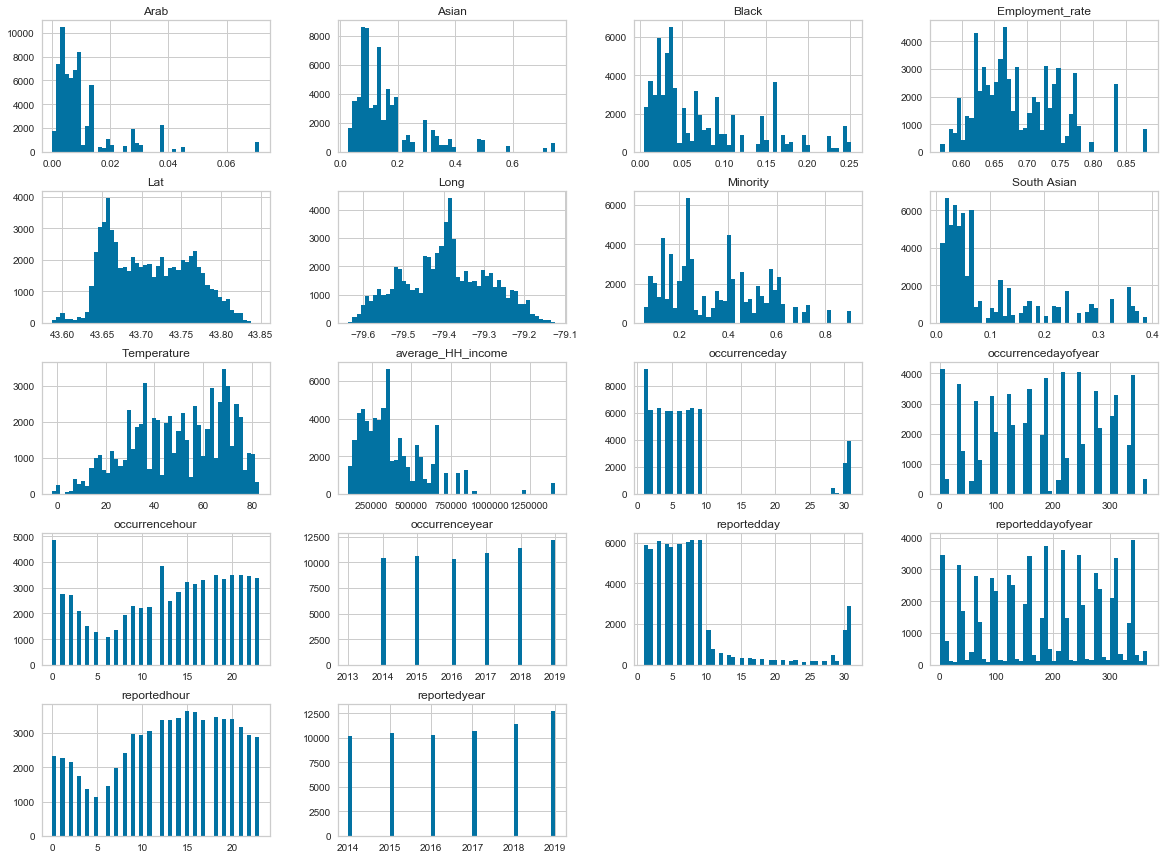

In [83]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
#save_fig("attribute_histogram_plots")
plt.show()

<Figure size 1440x1080 with 0 Axes>

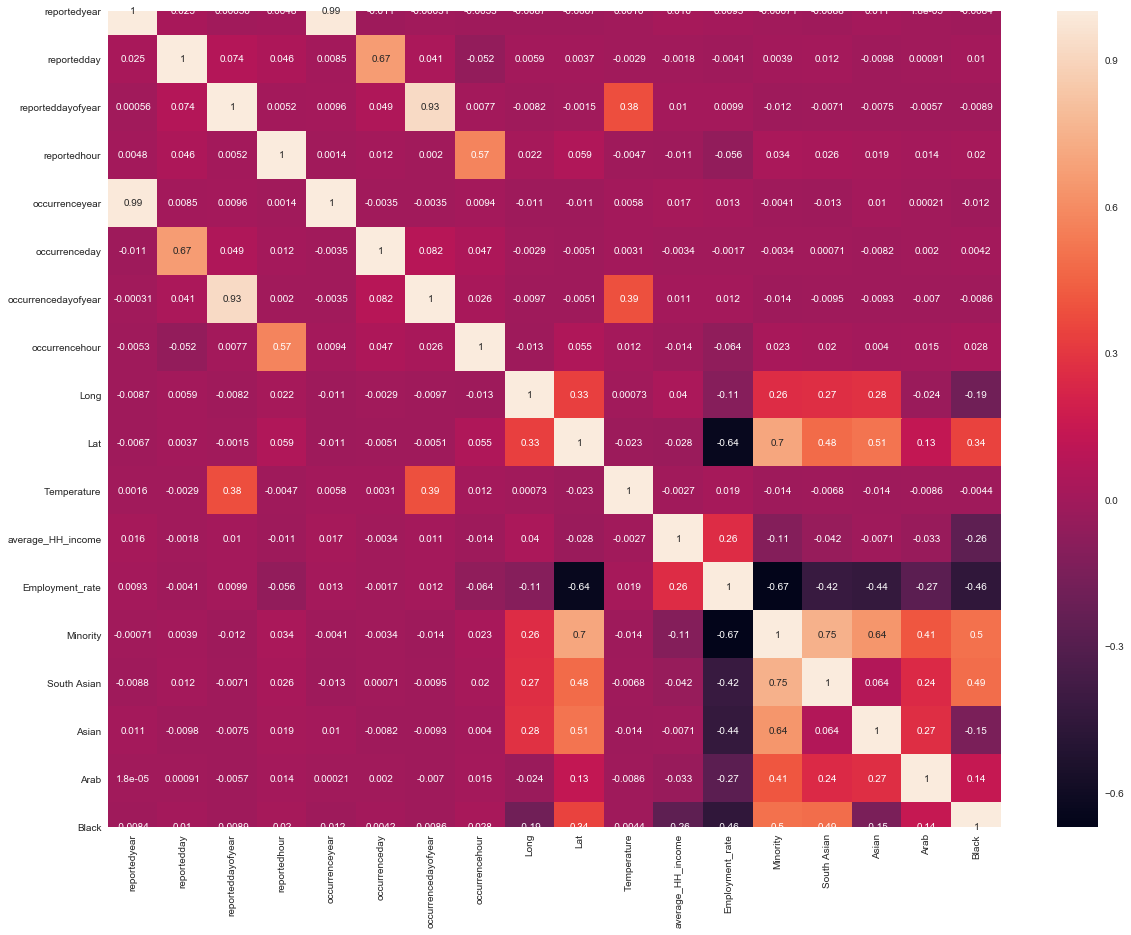

In [84]:
corr = df.corr()

plt.figure(figsize=(20,15))
sns.heatmap(corr, annot=True)

In [85]:
list(df)

['MCI',
 'occurrencedate',
 'reporteddate',
 'premisetype',
 'offence',
 'reportedyear',
 'reportedmonth',
 'reportedday',
 'reporteddayofyear',
 'reporteddayofweek',
 'reportedhour',
 'occurrenceyear',
 'occurrencemonth',
 'occurrenceday',
 'occurrencedayofyear',
 'occurrencedayofweek',
 'occurrencehour',
 'Division',
 'Neighbourhood',
 'Long',
 'Lat',
 'Temperature',
 'average_HH_income',
 'Employment_rate',
 'Minority',
 'South Asian',
 'Asian',
 'Arab',
 'Black']

In [86]:

df = df[df['occurrenceyear'] > 2013]
df.head()
df.shape
# looks like we eliminated about 1114 entries by factoring in only data > 2013 occurenceyear

,MCI,occurrencedate,reporteddate,premisetype,offence,reportedyear,reportedmonth,reportedday,reporteddayofyear,reporteddayofweek,...,Long,Lat,Temperature,average_HH_income,Employment_rate,Minority,South Asian,Asian,Arab,Black
8,Assault,2014-01-06T21:53:00.000Z,2014-01-06T21:53:00.000Z,House,Assault With Weapon,2014,January,6,6,Monday,...,-79.512070,43.756599,24,410012,0.598,0.455265,0.057679,0.190879,0.009256,0.197451
9,Assault,2014-01-08T17:59:00.000Z,2014-01-08T17:59:00.000Z,Other,Assault - Resist/ Prevent Seiz,2014,January,8,8,Wednesday,...,-79.383766,43.655720,9,352218,0.634,0.423753,0.068594,0.296060,0.037132,0.021967
10,Assault,2014-01-01T01:24:00.000Z,2014-01-01T01:24:00.000Z,Commercial,Assault Bodily Harm,2014,January,1,1,Wednesday,...,-79.427315,43.642937,14,202912,0.796,0.134455,0.017218,0.090346,0.002128,0.024763
11,Assault,2014-01-07T21:54:00.000Z,2014-01-07T23:19:00.000Z,Apartment,Assault,2014,January,7,7,Tuesday,...,-79.269806,43.711083,0,350777,0.686,0.409951,0.168311,0.164062,0.004386,0.073191
12,Assault,2014-01-06T15:19:00.000Z,2014-01-06T16:33:00.000Z,Other,Aggravated Assault,2014,January,6,6,Monday,...,-79.408958,43.656231,24,347339,0.765,0.101547,0.016077,0.069801,0.002239,0.013431


(65908, 29)

In [139]:
#'premisetype'
#'Division'
#'Long','Lat',
#'South Asian','Asian','Arab','Black'


col_list = ['MCI','premisetype','Long','Lat','occurrenceyear','occurrencedayofyear','occurrencemonth',
            'occurrencedayofweek','occurrencehour','Neighbourhood','Temperature','Employment_rate','Minority']

In [140]:
df1 = df[col_list]
df1.head()

,MCI,premisetype,Long,Lat,occurrenceyear,occurrencedayofyear,occurrencemonth,occurrencedayofweek,occurrencehour,Neighbourhood,Temperature,Employment_rate,Minority
8,Assault,House,-79.512070,43.756599,2014,6,January,Monday,21,Glenfield-Jane Heights,24,0.598,0.455265
9,Assault,Other,-79.383766,43.655720,2014,8,January,Wednesday,17,Bay Street Corridor,9,0.634,0.423753
10,Assault,Commercial,-79.427315,43.642937,2014,1,January,Wednesday,1,Little Portugal,14,0.796,0.134455
11,Assault,Apartment,-79.269806,43.711083,2014,7,January,Tuesday,21,Clairlea-Birchmount,0,0.686,0.409951
12,Assault,Other,-79.408958,43.656231,2014,6,January,Monday,15,Palmerston-Little Italy,24,0.765,0.101547


In [141]:
#There's some whitespace that needs to be stripped out of dataframe1 --> if we don't, one hot coding doubles up features
df1['occurrencedayofweek'] = df1['occurrencedayofweek'].str.strip()

<Figure size 1080x720 with 0 Axes>

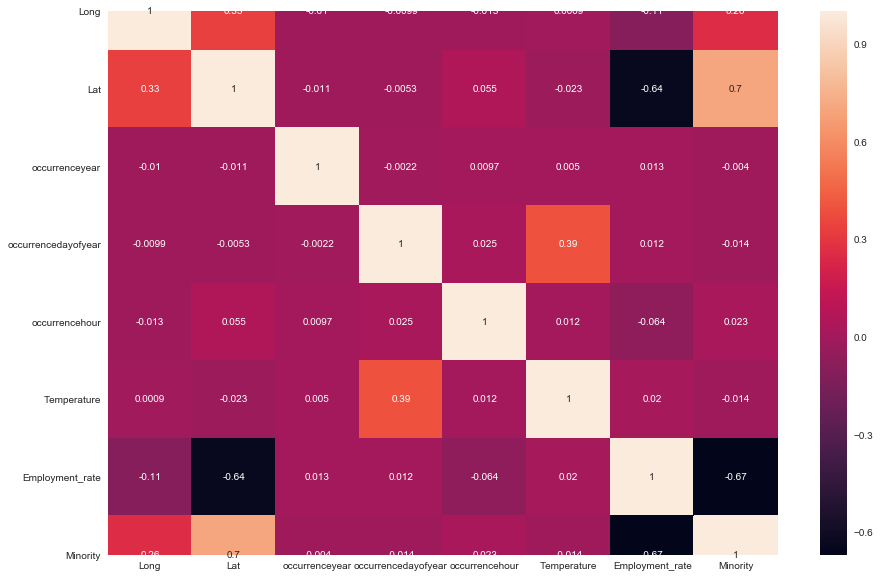

In [142]:
#resulting correlation map after getting rid of most features
corr = df1.corr()

plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True)

In [143]:

list(df1)

['MCI',
 'premisetype',
 'Long',
 'Lat',
 'occurrenceyear',
 'occurrencedayofyear',
 'occurrencemonth',
 'occurrencedayofweek',
 'occurrencehour',
 'Neighbourhood',
 'Temperature',
 'Employment_rate',
 'Minority']

In [144]:
X = df1.drop(['MCI'], axis=1)
y = df1['MCI']
X.head()
y.head()
X.shape
y.shape

,premisetype,Long,Lat,occurrenceyear,occurrencedayofyear,occurrencemonth,occurrencedayofweek,occurrencehour,Neighbourhood,Temperature,Employment_rate,Minority
8,House,-79.512070,43.756599,2014,6,January,Monday,21,Glenfield-Jane Heights,24,0.598,0.455265
9,Other,-79.383766,43.655720,2014,8,January,Wednesday,17,Bay Street Corridor,9,0.634,0.423753
10,Commercial,-79.427315,43.642937,2014,1,January,Wednesday,1,Little Portugal,14,0.796,0.134455
11,Apartment,-79.269806,43.711083,2014,7,January,Tuesday,21,Clairlea-Birchmount,0,0.686,0.409951
12,Other,-79.408958,43.656231,2014,6,January,Monday,15,Palmerston-Little Italy,24,0.765,0.101547


8     Assault
9     Assault
10    Assault
11    Assault
12    Assault
Name: MCI, dtype: object

(65908, 12)

(65908,)

In [145]:
#changing non-binary categories into binary
# Delete the redundant feature --> Eric
X = pd.get_dummies(X)
X.shape
X.head()
y.shape

(65908, 168)

,Long,Lat,occurrenceyear,occurrencedayofyear,occurrencehour,Temperature,Employment_rate,Minority,premisetype_Apartment,premisetype_Commercial,...,Neighbourhood_Willowdale West,Neighbourhood_Willowridge-Martingrove-Richview,Neighbourhood_Woburn,Neighbourhood_Woodbine Corridor,Neighbourhood_Woodbine-Lumsden,Neighbourhood_Wychwood,Neighbourhood_Yonge-Eglinton,Neighbourhood_Yonge-St.Clair,Neighbourhood_York University Heights,Neighbourhood_Yorkdale-Glen Park
8,-79.512070,43.756599,2014,6,21,24,0.598,0.455265,0,0,...,0,0,0,0,0,0,0,0,0,0
9,-79.383766,43.655720,2014,8,17,9,0.634,0.423753,0,0,...,0,0,0,0,0,0,0,0,0,0
10,-79.427315,43.642937,2014,1,1,14,0.796,0.134455,0,1,...,0,0,0,0,0,0,0,0,0,0
11,-79.269806,43.711083,2014,7,21,0,0.686,0.409951,1,0,...,0,0,0,0,0,0,0,0,0,0
12,-79.408958,43.656231,2014,6,15,24,0.765,0.101547,0,0,...,0,0,0,0,0,0,0,0,0,0


(65908,)

In [146]:
# Checking here for any whitespaces or incorrect features after one hot encoding
list(X)
X.shape

['Long',
 'Lat',
 'occurrenceyear',
 'occurrencedayofyear',
 'occurrencehour',
 'Temperature',
 'Employment_rate',
 'Minority',
 'premisetype_Apartment',
 'premisetype_Commercial',
 'premisetype_House',
 'premisetype_Other',
 'premisetype_Outside',
 'occurrencemonth_April',
 'occurrencemonth_August',
 'occurrencemonth_December',
 'occurrencemonth_February',
 'occurrencemonth_January',
 'occurrencemonth_July',
 'occurrencemonth_June',
 'occurrencemonth_March',
 'occurrencemonth_May',
 'occurrencemonth_November',
 'occurrencemonth_October',
 'occurrencemonth_September',
 'occurrencedayofweek_Friday',
 'occurrencedayofweek_Monday',
 'occurrencedayofweek_Saturday',
 'occurrencedayofweek_Sunday',
 'occurrencedayofweek_Thursday',
 'occurrencedayofweek_Tuesday',
 'occurrencedayofweek_Wednesday',
 'Neighbourhood_Agincourt North',
 'Neighbourhood_Agincourt South-Malvern West',
 'Neighbourhood_Alderwood',
 'Neighbourhood_Annex',
 'Neighbourhood_Banbury-Don Mills',
 'Neighbourhood_Bathurst Manor'

(65908, 168)

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 42, stratify = y)


In [148]:
X_train.head()
y_train.head()
X_test.head()
y_test.head()
X_train.shape
y_train.shape
X_test.shape
y_test.shape

,Long,Lat,occurrenceyear,occurrencedayofyear,occurrencehour,Temperature,Employment_rate,Minority,premisetype_Apartment,premisetype_Commercial,...,Neighbourhood_Willowdale West,Neighbourhood_Willowridge-Martingrove-Richview,Neighbourhood_Woburn,Neighbourhood_Woodbine Corridor,Neighbourhood_Woodbine-Lumsden,Neighbourhood_Wychwood,Neighbourhood_Yonge-Eglinton,Neighbourhood_Yonge-St.Clair,Neighbourhood_York University Heights,Neighbourhood_Yorkdale-Glen Park
50896,-79.152573,43.775299,2017,183,19,71,0.713,0.257369,0,0,...,0,0,0,0,0,0,0,0,0,0
43120,-79.324707,43.740791,2019,183,16,74,0.630,0.377787,0,0,...,0,0,0,0,0,0,0,0,0,0
9275,-79.283249,43.771736,2015,214,14,73,0.662,0.589705,0,0,...,0,0,0,0,0,0,0,0,0,0
513,-79.378449,43.713718,2014,338,8,31,0.663,0.166667,0,1,...,0,0,0,0,0,0,0,0,0,0
36536,-79.304504,43.729195,2014,212,2,72,0.665,0.345598,1,0,...,0,0,0,0,0,0,0,0,0,0


50896    Break and Enter
43120         Auto Theft
9275             Assault
513              Assault
36536         Auto Theft
Name: MCI, dtype: object

,Long,Lat,occurrenceyear,occurrencedayofyear,occurrencehour,Temperature,Employment_rate,Minority,premisetype_Apartment,premisetype_Commercial,...,Neighbourhood_Willowdale West,Neighbourhood_Willowridge-Martingrove-Richview,Neighbourhood_Woburn,Neighbourhood_Woodbine Corridor,Neighbourhood_Woodbine-Lumsden,Neighbourhood_Wychwood,Neighbourhood_Yonge-Eglinton,Neighbourhood_Yonge-St.Clair,Neighbourhood_York University Heights,Neighbourhood_Yorkdale-Glen Park
13321,-79.495644,43.679291,2016,306,0,54,0.648,0.213232,1,0,...,0,0,0,0,0,0,0,0,0,0
43526,-79.613579,43.721687,2019,126,16,60,0.685,0.603013,0,0,...,0,0,0,0,0,0,0,0,0,0
63110,-79.400681,43.788776,2019,122,18,44,0.613,0.544836,0,0,...,0,0,0,0,0,0,0,0,0,0
47801,-79.400230,43.715458,2015,9,10,18,0.746,0.080231,1,0,...,0,0,0,0,0,0,0,0,0,0
24261,-79.303879,43.669178,2018,309,23,30,0.768,0.059258,0,0,...,0,0,0,0,0,0,0,0,0,0


13321            Assault
43526         Auto Theft
63110            Robbery
47801    Break and Enter
24261            Assault
Name: MCI, dtype: object

(46135, 168)

(46135,)

(19773, 168)

(19773,)

In [149]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

X_train.head()
X_test.head()

MinMaxScaler(copy=True, feature_range=(0, 1))

,Long,Lat,occurrenceyear,occurrencedayofyear,occurrencehour,Temperature,Employment_rate,Minority,premisetype_Apartment,premisetype_Commercial,...,Neighbourhood_Willowdale West,Neighbourhood_Willowridge-Martingrove-Richview,Neighbourhood_Woburn,Neighbourhood_Woodbine Corridor,Neighbourhood_Woodbine-Lumsden,Neighbourhood_Wychwood,Neighbourhood_Yonge-Eglinton,Neighbourhood_Yonge-St.Clair,Neighbourhood_York University Heights,Neighbourhood_Yorkdale-Glen Park
0,0.942598,0.721481,0.6,0.498630,0.826087,0.858824,0.461783,0.236894,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.607338,0.589196,1.0,0.498630,0.695652,0.894118,0.197452,0.378368,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.688084,0.707822,0.2,0.583562,0.608696,0.882353,0.299363,0.627342,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.502667,0.485413,0.0,0.923288,0.347826,0.388235,0.302548,0.130331,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.646686,0.544740,0.0,0.578082,0.086957,0.870588,0.308917,0.340551,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,Long,Lat,occurrenceyear,occurrencedayofyear,occurrencehour,Temperature,Employment_rate,Minority,premisetype_Apartment,premisetype_Commercial,...,Neighbourhood_Willowdale West,Neighbourhood_Willowridge-Martingrove-Richview,Neighbourhood_Woburn,Neighbourhood_Woodbine Corridor,Neighbourhood_Woodbine-Lumsden,Neighbourhood_Wychwood,Neighbourhood_Yonge-Eglinton,Neighbourhood_Yonge-St.Clair,Neighbourhood_York University Heights,Neighbourhood_Yorkdale-Glen Park
0,0.274410,0.353436,0.4,0.835616,0.000000,0.658824,0.254777,0.185039,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.044712,0.515961,1.0,0.342466,0.695652,0.729412,0.372611,0.642977,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.459367,0.773145,1.0,0.331507,0.782609,0.541176,0.143312,0.574627,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.460243,0.492081,0.2,0.021918,0.434783,0.235294,0.566879,0.028782,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.647904,0.314669,0.8,0.843836,1.000000,0.376471,0.636943,0.004142,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [150]:
from sklearn.metrics import adjusted_mutual_info_score

mutual_info_scores = []

#calculate each feature in X_train --> calculate the mutual info score
for feature in X_train.columns:
    
    m_info = adjusted_mutual_info_score(X_train[feature], y_train)
    
    #append it to our list
    mutual_info_scores.append(m_info)

In [157]:
#put the mutual info score in a dataframe
results_frame = pd.DataFrame({'feature': X_train.columns,
                             'mutual_info_scores': mutual_info_scores
                             })

mutual_info_sorted = results_frame.sort_values(by='mutual_info_scores',ascending=[False])
mutual_info_sorted = round(mutual_info_sorted,3).head(9)
mutual_info_sorted

,feature,mutual_info_scores
12,premisetype_Outside,0.113
8,premisetype_Apartment,0.043
10,premisetype_House,0.042
0,Long,0.037
1,Lat,0.037
9,premisetype_Commercial,0.018
11,premisetype_Other,0.018
7,Minority,0.018
6,Employment_rate,0.014


<Figure size 1080x720 with 0 Axes>

<BarContainer object of 9 artists>

Text(0, 0.5, 'Mutual Info Shared With Target')

([0, 1, 2, 3, 4, 5, 6, 7, 8], <a list of 9 Text xticklabel objects>)

(array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12]),
 <a list of 7 Text yticklabel objects>)

[]

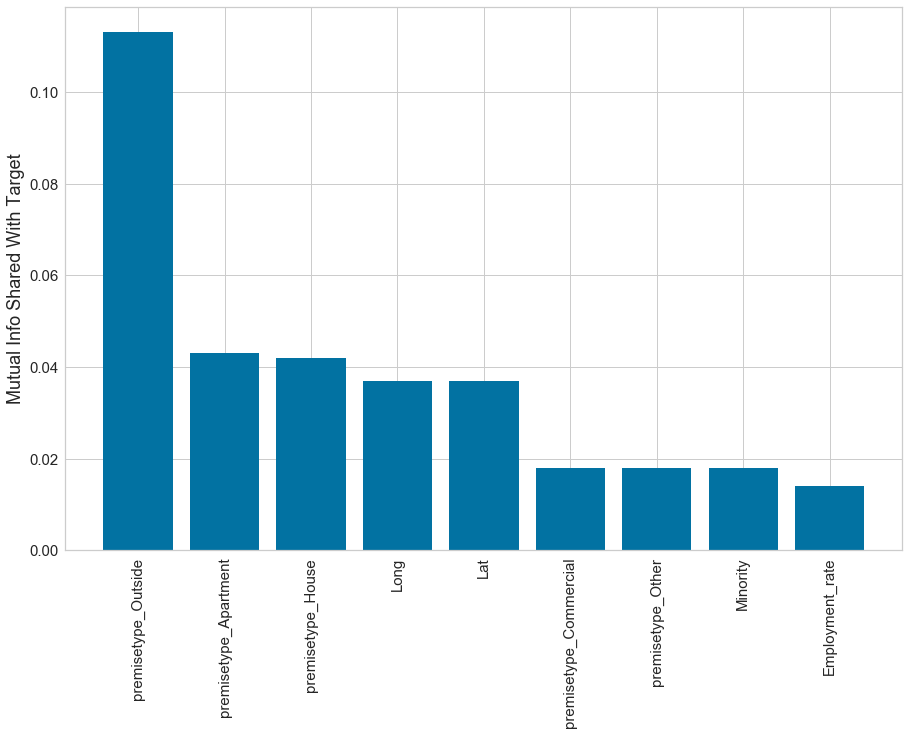

In [158]:
#plots the mutual info score and features so we can find important features
plt.figure(figsize=(15,10))
plt.bar(mutual_info_sorted['feature'].values, mutual_info_sorted['mutual_info_scores'].values)
plt.ylabel('Mutual Info Shared With Target',fontsize = 18)
plt.xticks(rotation=90,fontsize = 15)
plt.yticks(fontsize = 15)
plt.plot()

In [153]:
from sklearn.tree import DecisionTreeClassifier

#clf_dt = DecisionTreeClassifier(random_state=42, criterion="entropy",
#                             min_samples_split=8, min_samples_leaf=8, max_depth=49, max_leaf_nodes=20)


clf_dt = DecisionTreeClassifier(random_state=42)


clf_dt.fit(X_train, y_train)
#clf_dt.fit(X_train_res, y_train_res)

y_pred_dt = clf_dt.predict(X_test)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [154]:
feature_names = X.columns
class_names_dt = [str(x) for x in clf_dt.classes_]

In [155]:

clf_dt.predict_proba(X_test);
clf_dt.predict(X_test);

In [156]:

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_dt, target_names=class_names_dt))

                 precision    recall  f1-score   support

        Assault       0.69      0.69      0.69     10862
     Auto Theft       0.40      0.40      0.40      2235
Break and Enter       0.49      0.47      0.48      3937
        Robbery       0.38      0.40      0.39      2067
     Theft Over       0.08      0.08      0.08       672

       accuracy                           0.56     19773
      macro avg       0.41      0.41      0.41     19773
   weighted avg       0.56      0.56      0.56     19773

